In [2]:
"""
Created on Thu Sep 22 13:06:00 2022

# Explorative Data Analysis Workshop 1  (Statistics for DS)


The instructions in this file assume that you are using Spyder by Anaconda. 
They might be different if you are using Jupyler. For example: Jupyler prints
all columns when you use the command df.head(). Spyder just prints some columns, 
it is desirable to use the Variable Explorer instead. 


# Objective:
    1.- Execute a simple EDA.
    2.- Clean DATA
    3.- Plot Distributions and Box Plots
    4.- Proof that there is a relationship between area and house cost.
    5.- Plot a Categorial Data
    6.- Plot a Correlation Matrix
 
    
@author: Alejandro Murrieta-Mendoza
"""
# 0: Import all your required libreries 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import pandas as pd
import numpy as np

import math

In [3]:
df = pd.read_csv("./salaries.csv")
df_original = df.copy()

In [4]:
columns = ["timestamp", "age", "industry", "job_title", "job_title_info", "salary", "additional_comp", "currency", "other_curr", "additional_context", "country", "us_state", "city", "overall_exp", "job_exp", "education", "gender", "race"]

header_df = pd.DataFrame({
    "header": columns,
    "description": df.keys()
})

for i in header_df.iterrows():
    print(i[1][1])

Timestamp
How old are you?
What industry do you work in?
Job title
If your job title needs additional context, please clarify here:
What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)
How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.
Please indicate the currency
If "Other," please indicate the currency here: 
If your income needs additional context, please provide it here:
What country do you work in?
If you're in the U.S., what state do you work in?
What city do you work in?
How many years of professional work experience do you have overall?
How many years of professional work experience do you have in your field?
What is your highest level of education completed?
What is 

/tmp/ipykernel_17267/1732384341.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(i[1][1])


In [5]:
df.columns = columns
data_head = df.head()

data_head

,timestamp,age,industry,job_title,job_title_info,salary,additional_comp,currency,other_curr,additional_context,country,us_state,city,overall_exp,job_exp,education,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [6]:
shape = df.shape

print(f"Variables: {shape[1]}, Datapoints: {shape[0]}")
print(f"Continuous: Timestamp, Salary, Additional compensation")
print(f"Discrete: Age, Overall experience, Job experience")
print(f"Categorical: Industry, Job_title, Currency, Country, US State, City, Education, Gender, race")

df.dtypes.astype(str).value_counts()

Variables: 18, Datapoints: 27981
Continuous: Timestamp, Salary, Additional compensation
Discrete: Age, Overall experience, Job experience
Categorical: Industry, Job_title, Currency, Country, US State, City, Education, Gender, race


object     17
float64     1
Name: count, dtype: int64

Remove Some unnecessary columns

In [7]:
df = df.drop(['job_title_info', 'additional_context', 'other_curr'], axis=1)
df.head()

,timestamp,age,industry,job_title,salary,additional_comp,currency,country,us_state,city,overall_exp,job_exp,education,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",NaN,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,"62,000",3000.0,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [8]:
df['additional_comp'] = df['additional_comp'].fillna(0)

Add salary and additional compensation

In [9]:
# convert to integers
df['salary'] = df['salary'].apply(lambda x: int(x.replace(',', '')))

# Add
df['income'] = df['salary'] + df['additional_comp']

# Remove salary and additional comp
df = df.drop(['salary', 'additional_comp'], axis=1)

print(df['currency'].unique())

['USD' 'GBP' 'CAD' 'EUR' 'AUD/NZD' 'Other' 'CHF' 'ZAR' 'SEK' 'HKD' 'JPY']


In [10]:
print(df.shape)

df = df.drop(df[df['currency'] == "Other"].index)

print(df.shape)

(27981, 14)
(27824, 14)


In [11]:
# Conversion values:

curr = {
    "EUR": 1,
    "USD": 0.94,
    "CAD": 0.69,
    "GBP": 1.15,
    "AUD/NZD": 0.60,
    "CHF": 1.04,
    "ZAR": 0.049,
    "SEK": 0.086,
    "HKD": 0.12,
    "JPY": 0.0063
}

In [12]:
df.head()

,timestamp,age,industry,job_title,currency,country,us_state,city,overall_exp,job_exp,education,gender,race,income
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,58600.0
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,65000.0
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,67000.0


In [13]:

df['income'] = df.apply(lambda row: row['income'] * curr[row['currency']], axis=1)

# Corrected for currency, so remove currency column
df = df.drop('currency', axis=1)

df.head()


,timestamp,age,industry,job_title,country,us_state,city,overall_exp,job_exp,education,gender,race,income
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,51700.0
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,67390.0
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,31960.0
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,61100.0
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,62980.0


In [14]:
df.isnull().sum()

timestamp         0
age               0
industry         71
job_title         0
country           0
us_state       4850
city             80
overall_exp       0
job_exp           0
education       210
gender          167
race            168
income            0
dtype: int64

In [15]:
len(df['industry'].unique())

1206

In [16]:
len(df['job_title'].unique())

14238

In [17]:
len(df['city'].unique())

4742

In [29]:
len(df['race'].unique())

48

1206 industries and 14238 job titles... This is way too many to do anything useful with. So let's get rid of them. City is also too specific, will categorize only by county and US State.

In [18]:
df = df.drop(['industry', 'job_title', 'city'], axis=1)

df.isnull().sum()

timestamp         0
age               0
country           0
us_state       4850
overall_exp       0
job_exp           0
education       210
gender          167
race            168
income            0
dtype: int64

In [19]:
# Remove fields where no education, gender, or race is given

df = df[df['gender'].notna() & df['education'].notna() & df['race'].notna()]

In [20]:
df.isnull().sum()

timestamp         0
age               0
country           0
us_state       4739
overall_exp       0
job_exp           0
education         0
gender            0
race              0
income            0
dtype: int64

In [21]:
print(df.shape)
df['income'].describe().apply(lambda x: format(x, 'f'))

(27384, 10)


count       27384.000000
mean        93628.344651
std        584707.230740
min             0.000000
25%         50835.200000
50%         71440.000000
75%        106220.000000
max      95880000.000000
Name: income, dtype: object

Now, there are only null/nan values in the field for 'us_state', which is to be expected for non-us countries

In [61]:
age_income = df.groupby('age')['income'].mean()



# Move under 18 row to first
age_income_order = []
age_income_labels = []

age_income_order.append(age_income[6])
age_income_order.extend(age_income[0:6])

age_income_labels.append(age_income.keys()[6])
age_income_labels.extend(age_income.keys()[0:6])

age_income_order

/tmp/ipykernel_17267/3413854156.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_income_order.append(age_income[6])


[64245.9709090909,
 58092.72443191674,
 88815.39059755405,
 100349.0280381837,
 102013.45271387376,
 103490.77241237112,
 92122.04804347827]

/home/pstet/code/foe-exercises/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pstet/code/foe-exercises/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/pstet/code/foe-exercises/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/home/pstet/code/foe-exercises/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ver

<Axes: >

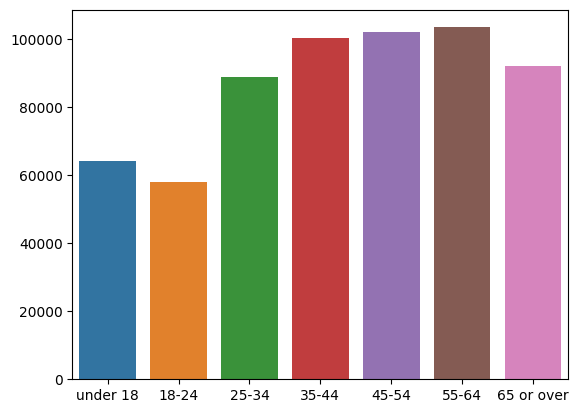

In [62]:
sns.barplot(x=age_income_labels, y=age_income_order)
